# Personal Information
Name: Daan Schoppink

StudentID: 11274859

Email: daanschoppink@student.uva.nl

Submitted on: **19.03.2023**

GitHub: https://github.com/DaanS97/Thesis.git

# Data Context
There are two datasets that will be used for this thesis: one is a dataset containing post World War Two(WW2) comics which are about WW2 and the second dataset is a dataset of actual photographs made during WW2. The comic dataset is provided by NIOD and the comics themselves are Commando comics. The photgraph dataset is provided by Beeldbank WO2, unfortunatly the dataset is not available in a usuable format yet. Final goal is to find data from the photographs database that is similair to a comic

# Data Description

Data analysis image data is limited without creating image embeddings. Due to image embedding being the core of this thesis no functioning embedding model was ready at this stage, therefore, the EDA is limited. 

Analysis showed that there are 427 comics, with a total of 28875 pages, resulting in an average of 68 pages per comic. Of all these pages the smallest one was HXW and the largest was HXW, with a total of 2526 different page dimensions. This suggests that it would be wise to, during preprocssing, resize all the images CNN learn more effective with smaller images. In addation, the dimension data is not normally distributed.

Furthermore, the pages dimensions seem to congegrate into blobs with only a few outliers.

In [64]:
# Imports
import os
from os import walk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns
import sys

### Data Loading

In [38]:
'''Loads in all the comics. paths of the files 
in the comic folders that dont end in either: 
.jpg, .png or jpeg are not saved.'''

path = r"./comics/commando_comics/decompressed"

files = []
comics = [x[1] for x in os.walk(path)][0]
for (root, dirnames, filenames) in walk(path):
    for fn in filenames:
        if not fn.lower().endswith((".jpg", ".png", ".jpeg")):
            continue
        else:
            files.append(os.path.join(root,fn))

In [100]:
'''Convert all page paths to Image objects and store them'''
pages = []
for f in files:
    im = Image.open(f)
    pages.append(im)
    im.close()

### Analysis 1: 
Make sure to add some explanation of what you are doing in your code. This will help you and whoever will read this a lot in following your steps.

In [86]:
# Insight in total data

print("There is a total of " + str(len(comics)) + " comics.")
print("In total there are " + str(len(pages)) + " pages.")
print("This comes down to an average of " + str(round(len(pages)/len(comics))) + " pages per comic.")

There is a total of 427 comics.
In total there are 28875 pages.
This comes down to an average of 68 pages per comic.


### Analysis 2: 

Smallest dimension: (386, 493)
Largest dimension: (5157, 6825)
Total unique dimensions: 2526


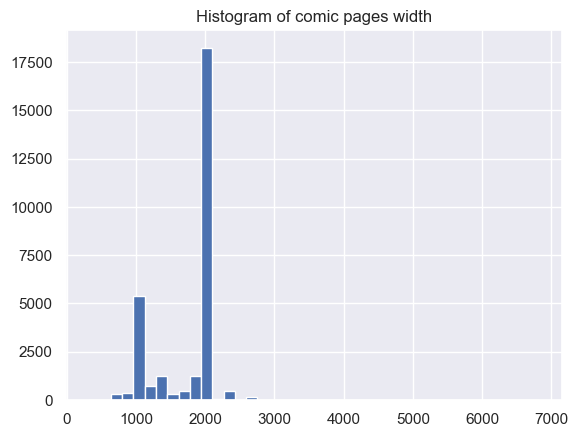

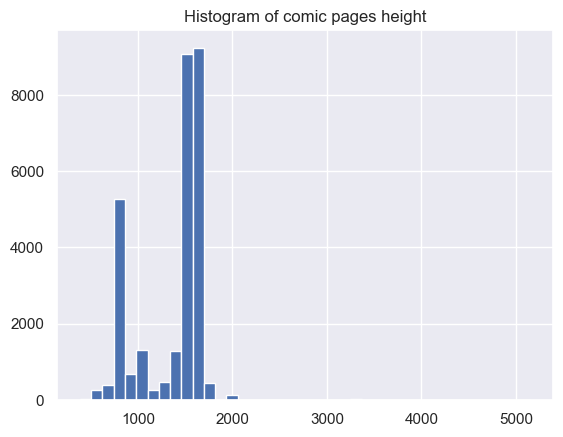

In [108]:
sns.set_theme()
p_dims = []
for p in pages:
    p_dims.append(p.size)
    
p_dims_set = set(p_dims)

print("Smallest dimension: " + str(min(p_dims_set)))
print("Largest dimension: " + str(max(p_dims_set)))
print("Total unique dimensions: " + str(len(p_dims_set)))
      
# Save all image dimension in a df
dim_df = pd.DataFrame(p_dims, columns=["height", "width"])

# How are both the height in width distributed
plt.hist(dim_df.width, bins=40)
plt.title("Histogram of comic pages width")
plt.show()

plt.hist(dim_df.height, bins=40)
plt.title("Histogram of comic pages height")
plt.show()

### Analysis 3:

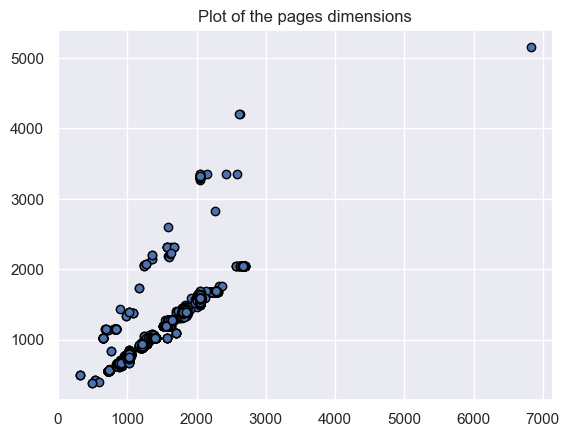

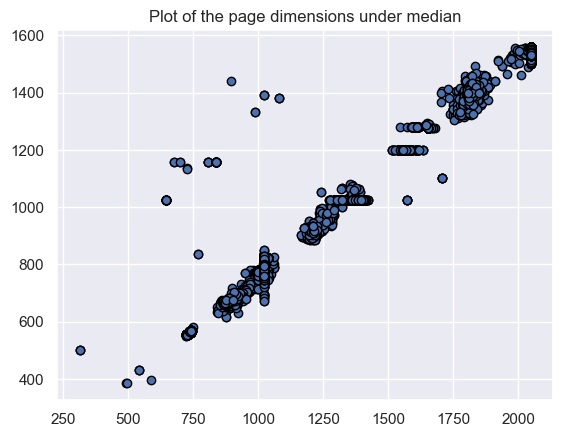

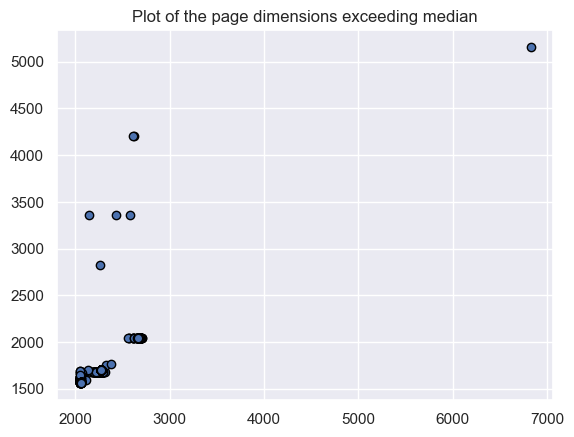

In [111]:
plt.scatter(x=dim_df.width, y=dim_df.height, edgecolors= "black")
plt.title("Plot of the pages dimensions")
plt.show()

mHeight = dim_df.height.median()
mWidth = dim_df.width.median()

dim_df_up = dim_df.loc[(dim_df["height"] > mHeight) & (dim_df["width"] > mWidth)]
dim_df_un = dim_df.loc[(dim_df["height"] <= mHeight) & (dim_df["width"] <= mWidth)]

plt.scatter(x=dim_df_un.width, y=dim_df_un.height, edgecolors= "black")
plt.title("Plot of the page dimensions under median")
plt.show()
plt.scatter(x=dim_df_up.width, y=dim_df_up.height, edgecolors= "black")
plt.title("Plot of the page dimensions exceeding median")
plt.show()